In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Question 1:

Open the NHANES (or Ames prices or college completion datasets, if you prefer)

Find two categorical variables of interest (there are 198, and short descriptions are given in the nhanes_meta_17_18.csv file). 

Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)

Compute a contingency table for your categorical 
 and 

Discuss any interesting patterns (or lack of one) that you observe

The two categorical variables of interest that I focused on where "General Health Condition" and "Covered by Insurance". The first couple sections of code are focused on understanding the dataset and gauging the number of null values per variable. The contingency table is further below.

In [6]:
nhahes=pd.read_csv("nhanes_data_17_18.csv")

/var/folders/09/89r30_ms6xdcd7znk61plqgr0000gn/T/ipykernel_14955/1080473744.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhahes=pd.read_csv("nhanes_data_17_18.csv")


In [7]:
nhahes.head()

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
nhahes.dtypes

SEQN                                   float64
GeneralHealthCondition                  object
EverBreastfedOrFedBreastmilk           float64
AgeStoppedBreastfeedingdays            float64
AgeFirstFedFormuladays                 float64
                                        ...   
UnitOfMeasureDayweekmonthyear_2_SMQ     object
CurrentSelfreportedHeightInches        float64
CurrentSelfreportedWeightPounds        float64
TriedToLoseWeightInPastYear            float64
TimesLost10LbsOrMoreToLoseWeight        object
Length: 198, dtype: object

In [9]:
 nhahes['GeneralHealthCondition'].isna().sum()

np.int64(2402)

In [10]:
nhahes["GeneralHealthCondition"]

0             NaN
1             NaN
2            Good
3       Very good
4            Good
          ...    
8361    Very good
8362      Fair or
8363         Good
8364    Very good
8365         Good
Name: GeneralHealthCondition, Length: 8366, dtype: object

In [11]:
nhahes["EverBreastfedOrFedBreastmilk"]

0       1.0
1       1.0
2       NaN
3       NaN
4       NaN
       ... 
8361    NaN
8362    NaN
8363    NaN
8364    NaN
8365    NaN
Name: EverBreastfedOrFedBreastmilk, Length: 8366, dtype: float64

In [12]:
nhahes["TimesLost10LbsOrMoreToLoseWeight"].isna().sum()

np.int64(2572)

In [13]:
nhahes["CoveredByHealthInsurance"].isna().sum()

np.int64(20)

In [14]:
nhahes.isna().sum()

SEQN                                      0
GeneralHealthCondition                 2402
EverBreastfedOrFedBreastmilk           7297
AgeStoppedBreastfeedingdays            7504
AgeFirstFedFormuladays                 7289
                                       ... 
UnitOfMeasureDayweekmonthyear_2_SMQ    7870
CurrentSelfreportedHeightInches        2590
CurrentSelfreportedWeightPounds        2538
TriedToLoseWeightInPastYear            3279
TimesLost10LbsOrMoreToLoseWeight       2572
Length: 198, dtype: int64

In [15]:
nhahes["GeneralHealthCondition"].value_counts()

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

Contingency Table and Interpretation

Based on the contingency table, patients that are covered by health insurance are far more likely to have excellent and good health compared to patients that aren't covered by health insurance. In fact, amongst patients with health insurance, those with excellent and with very good health make up 10.8% and 27.3&=%, respectively, of patients with health insurance. This is different from patients without health insurance. Within this group, only 17% have very good health and less than 8% have excellent health.

In [16]:
    contingency_table = pd.crosstab(nhahes['GeneralHealthCondition'], nhahes['CoveredByHealthInsurance'], margins=True)
    print(contingency_table)

CoveredByHealthInsurance  0.0   1.0   All
GeneralHealthCondition                   
Excellent                  66   551   617
Fair or                   210   959  1169
Good                      377  2071  2448
Poor?                      34   138   172
Very good                 144  1398  1542
All                       831  5117  5948


In [17]:

pd.crosstab(nhahes['GeneralHealthCondition'], nhahes['CoveredByHealthInsurance'], normalize='columns')

CoveredByHealthInsurance,0.0,1.0
GeneralHealthCondition,,
Excellent,0.079422,0.107680
Fair or,0.252708,0.187415
Good,0.453670,0.404729
Poor?,0.040915,0.026969
Very good,0.173285,0.273207


Question 2

First, I started out by examining different variables and their number of missing values. I decided to use General Health Condition as the categorical variable and Minutes Ratio of Family Income to Poverty level as numerical variable because each variable has a "similar" amount of missing values

Note- I will describe the patterns I observe after the following code segments.

In [21]:
nhahes['RatioOfFamilyIncomeToPoverty'].isna().sum()

np.int64(1034)

In [22]:
nhahes['GeneralHealthCondition'].isna().sum()

np.int64(2402)

In [23]:
nhahes['MinutesSedentaryActivity'].isna().sum()

np.int64(2843)

In [24]:
nhahes['HowHealthyIsTheDiet'].isna().sum()

np.int64(2540)

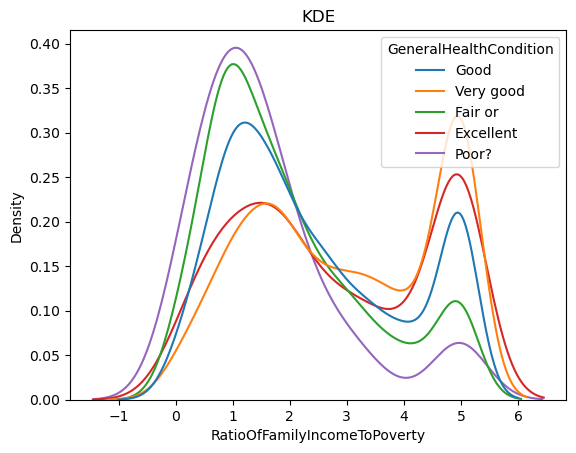

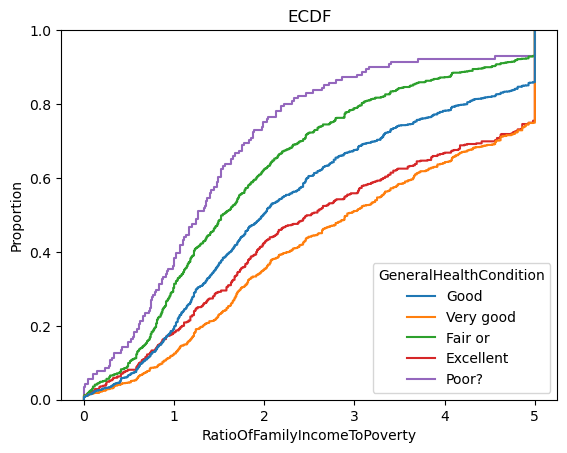

RatioOfFamilyIncomeToPoverty                      \
                                              count      mean       std   
GeneralHealthCondition                                                    
Excellent                                     555.0  2.794144  1.710426   
Fair or                                      1007.0  1.948143  1.399251   
Good                                         2174.0  2.405846  1.548411   
Poor?                                         141.0  1.576383  1.276729   
Very good                                    1365.0  2.996418  1.624742   

                                                              
                                 min   25%   50%    75%  max  
GeneralHealthCondition                                        
Excellent               5.397605e-79  1.28  2.52  4.955  5.0  
Fair or                 5.397605e-79  0.89  1.54  2.735  5.0  
Good                    5.397605e-79  1.14  1.99  3.650  5.0  
Poor?                   5.397605e-79  0.74  1.27  1.980  5.0  
Very good               5.397605e-79  1.60  2.92  5.000  5.0

In [33]:
conditioner = 'GeneralHealthCondition'
sns.kdeplot( data=nhahes, x='RatioOfFamilyIncomeToPoverty', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=nhahes, x='RatioOfFamilyIncomeToPoverty', hue=conditioner).set(title='ECDF')
plt.show()
nhahes.loc[:,['RatioOfFamilyIncomeToPoverty', conditioner]].groupby(conditioner).describe()

An interesting pattern i noticed is that categories with higher general health conditions, such as "Excellent" or "Very Good", tend to have greater median ratio of family income to poverty levels when compared to lower general health conditions.

In context, this makes sense, since families that are closer to the poverty line may have a harder time affording medical treatment or healthy food. With more data and context, it can be possible to understand the factors behind this pattern.  

Question 3:

In [ ]:
# mapping so that the categorical variables can be represented as numerical
mapping = {
    "Poor?": 1,
    "Fair or": 2,
    "Good": 3,
    "Very good": 4,
    "Excellent": 5
}
y = nhahes["GeneralHealthCondition"].map(mapping)


In [46]:
nhahes["GeneralHealthCondition_num"] = nhahes["GeneralHealthCondition"].map(mapping)

Computed bandwidth is: 0.23635695227362422


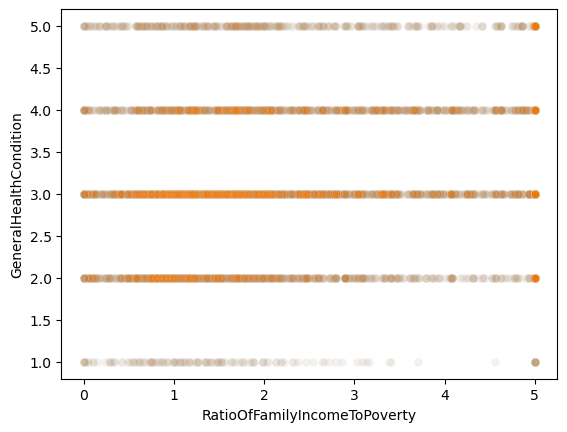

In [52]:
x = nhahes['RatioOfFamilyIncomeToPoverty']

def lcls(x,y, h = None, plot=True):
    ''' Computes local constant least squares regression estimates with Gaussian kernel. '''

    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    # Compute bandwidth, if none provided:
    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
        print(f'Computed bandwidth is: {h}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator
    
    if plot:
        sns.scatterplot(x=x, y=y, alpha=0.05)
        sns.lineplot(x=grid, y=y_hat, color="orange")

    # Plot results:
    if plot:
        sns.scatterplot(data=nhahes, y="GeneralHealthCondition_num", x='RatioOfFamilyIncomeToPoverty',alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')
        

    return y_hat, grid

y_hat, grid = lcls(x,y)

Question 5:

For this question, I focused on analyzing the metabric dataset. The X variable I focused on is number of "Lymph nodes examined positive," and the Y variable I focused on is "Tumor Size". I plotted the scatterplots and CEF in the following code blocks, along with the corresponding explanations.

In [56]:
#Question 5:

metabric=pd.read_csv("metabric.csv")

In [57]:
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


The following scatterplot displays a general trend where the tumor size tends to increase as the number of lymph nodes examined as positive increases. The datapoints are clustered towards the lower left portion of the graph, suggesting that when there a few number of lymph nodes examined as positive, the tumor size is also relatively small. As the number of positive lymph nodes increases, the data points become more widely dispersed. This dispersion suggests that the relationship between the two variables isn't strong or perfectly linear

<Axes: xlabel='Lymph nodes examined positive', ylabel='Tumor Size'>

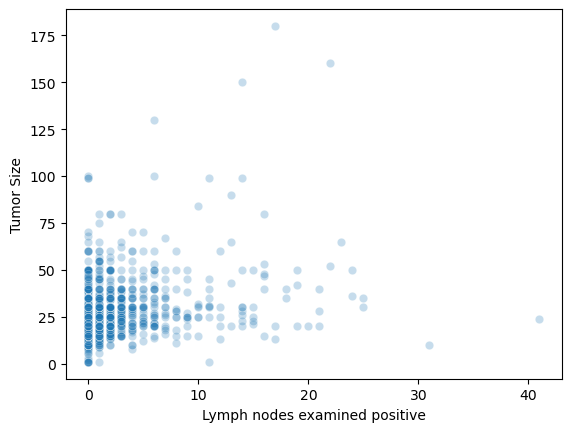

In [68]:
sns.scatterplot(x=metabric["Lymph nodes examined positive"], y=metabric["Tumor Size"],alpha=.25)
#sns.lineplot(x=grid, y=y_hat, color="orange")


,Tumor Size
Lymph nodes examined positive,
0.0,22.183079
1.0,25.420502
2.0,28.724771
3.0,30.434783
4.0,30.756098
5.0,31.964286
6.0,37.303030
7.0,32.437500
8.0,29.909091


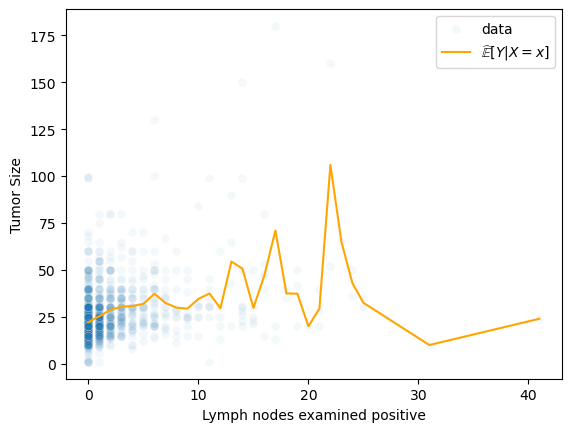

In [60]:
means = metabric.loc[:,["Tumor Size",'Lymph nodes examined positive']].groupby('Lymph nodes examined positive').mean()
sns.scatterplot(data=metabric, y='Tumor Size', x='Lymph nodes examined positive',alpha=.05, label='data')
sns.lineplot(data=means, x='Lymph nodes examined positive',y='Tumor Size',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

means

There are some missing variables that might explain at least part of the relationship between "Tumor Size" and "Lymph nodes examined positive". 
For example, a patient's tumor size could also be impacted by their BMI, cancer grade, or genetics. As a result, there are hypothetical threats to causal identification of the effect of the number of "Lymph nodes examined positive" on a patient's "Tumor Size"

The model can still be used to predict Y given X, even with the threat to causal identification. This is because the goal of a preditive model is to be able to accurately guess an outcome based off of patterns and correlations in data. On the other hand, causal inference strives to understand what an outcome would be if you modified a variable. Causal inference relies on isolating the effect of X on Y from all external factors. 

In other words, the predictive model predicts Tumor size based on the occurance of the number of lymph nodes, but the model is not "saying" that the number of lymph nodes that are positive causes tumor size to increase. The predictive model is mearly observing a correlation between variables and trying to predict an outcome based on that correlation. 